# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/homework2

/content/drive/My Drive/homework2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [0]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [0]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [0]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [0]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [11]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.

Epoch [0][20]	 Batch [0][550]	 Training Loss 478.0000	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss 545.5686	 Accuracy 0.1725
Epoch [0][20]	 Batch [100][550]	 Training Loss 485.3020	 Accuracy 0.2593
Epoch [0][20]	 Batch [150][550]	 Training Loss 449.7185	 Accuracy 0.3412
Epoch [0][20]	 Batch [200][550]	 Training Loss 421.9328	 Accuracy 0.4095
Epoch [0][20]	 Batch [250][550]	 Training Loss 400.9323	 Accuracy 0.4602
Epoch [0][20]	 Batch [300][550]	 Training Loss 379.0548	 Accuracy 0.4992
Epoch [0][20]	 Batch [350][550]	 Training Loss 361.1282	 Accuracy 0.5309
Epoch [0][20]	 Batch [400][550]	 Training Loss 342.7506	 Accuracy 0.5585
Epoch [0][20]	 Batch [450][550]	 Training Loss 327.9058	 Accuracy 0.5812
Epoch [0][20]	 Batch 

In [12]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...

The test accuracy is 0.9267.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [0]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [14]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 855.5000	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 403.6176	 Accuracy 0.5557
Epoch [0][20]	 Batch [100][550]	 Training Loss 305.9257	 Accuracy 0.6621
Epoch [0][20]	 Batch [150][550]	 Training Loss 261.5132	 Accuracy 0.7093
Epoch [0][20]	 Batch [200][550]	 Training Loss 232.3408	 Accuracy 0.7420
Epoch [0][20]	 Batch [250][550]	 Training Loss 211.1952	 Accuracy 0.7661
Epoch [0][20]	 Batch [300][550]	 Training Loss 194.5000	 Accuracy 0.7838
Epoch [0][20]	 Batch [350][550]	 Training Loss 183.2422	 Accuracy 0.7962
Epoch [0][20]	 Batch [400][550]	 Training Loss 172.6633	 Accuracy 0.8070
Epoch [0][20]	 Batch [450][550]	 Training Loss 165.0044	 Accuracy 0.8156
Epoch [0][20]	 Batch [500][550]	 Training Loss 158.4810	 Accuracy 0.8231

Epoch [0]	 Average training loss 152.5000	 Average training accuracy 0.8298
Epoch [0]	 Average validation loss 69.6300	 Average validation accuracy 0.9224

Epoch [1][20]	 Batch [0][550]	 Training Los

In [15]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9622.



## Plot

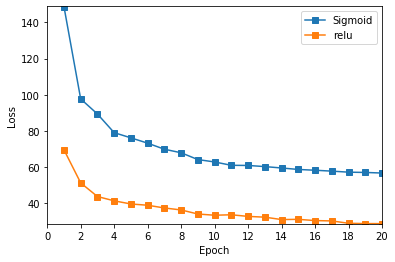

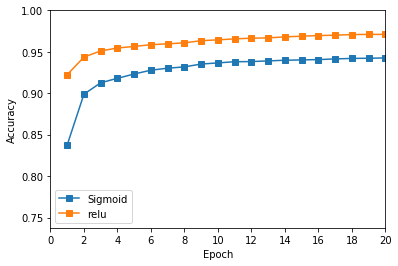

In [16]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [0]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [0]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [19]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7864	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.6777	 Accuracy 0.1125
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.6215	 Accuracy 0.1127
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.5709	 Accuracy 0.1143
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5310	 Accuracy 0.1173
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4983	 Accuracy 0.1190
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4710	 Accuracy 0.1226
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4476	 Accuracy 0.1258
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.4276	 Accuracy 0.1287
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.4099	 Accuracy 0.1325
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3939	 Accuracy 0.1370

Epoch [0]	 Average training loss 2.3794	 Average training accuracy 0.1424
Epoch [0]	 Average validation loss 2.2209	 Average validation accuracy 0.2146

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2088	 Accuracy 0.2300

### Test

In [20]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7009.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [0]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [22]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5536	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4553	 Accuracy 0.1241
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4091	 Accuracy 0.1304
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3659	 Accuracy 0.1448
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3231	 Accuracy 0.1631
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2818	 Accuracy 0.1841
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2426	 Accuracy 0.2071
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2092	 Accuracy 0.2252
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1769	 Accuracy 0.2435
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1474	 Accuracy 0.2605
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1182	 Accuracy 0.2776

Epoch [0]	 Average training loss 2.0902	 Average training accuracy 0.2949
Epoch [0]	 Average validation loss 1.7624	 Average validation accuracy 0.4928

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7807	 Accuracy 0.3900

In [23]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8655.



## Plot

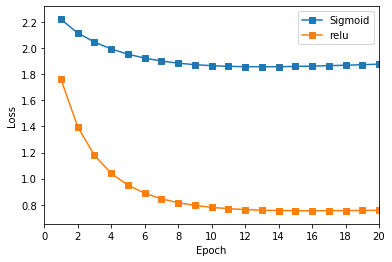

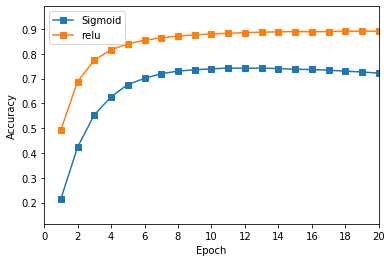

In [24]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [36]:
batch_size = 100
max_epoch = 20
init_std = 0.01
learning_rate_SGD = 0.001
weight_decay = 0.1
disp_freq = 50

myNetwork = Network()
myNetwork.add(FCLayer(784, 256))
myNetwork.add(ReLULayer())
myNetwork.add(FCLayer(256, 128))
myNetwork.add(ReLULayer())
myNetwork.add(FCLayer(128, 10))

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

myNetwork, net_loss, net_acc = train(myNetwork, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(myNetwork, criterion, data_test, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6337	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5214	 Accuracy 0.1020
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4348	 Accuracy 0.1090
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3677	 Accuracy 0.1244
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3161	 Accuracy 0.1432
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2652	 Accuracy 0.1700
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2217	 Accuracy 0.1970
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1842	 Accuracy 0.2224
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1452	 Accuracy 0.2502
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1105	 Accuracy 0.2751
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0788	 Accuracy 0.2968

Epoch [0]	 Average training loss 2.0465	 Average training accuracy 0.3202
Epoch [0]	 Average validation loss 1.6545	 Average validation accuracy 0.5984

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6014	 Accuracy 0.6200

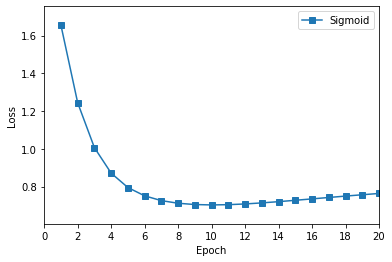

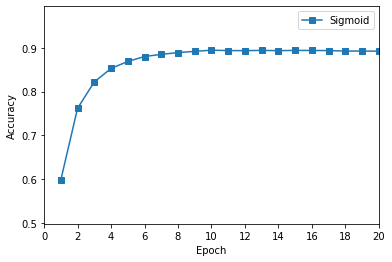

In [37]:
plot_loss_and_acc({'Sigmoid': [net_loss, net_acc]})